In [2]:
import pandas as pd

Importing data

In [3]:
 # ## rajat directory
from google.colab import drive 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# ## arnav directory
# from google.colab import drive 
# drive.mount("/content/gdrive")
# csv_file_name= "actual_data.csv"
# data = pd.read_csv("/content/gdrive/My Drive/"+csv_file_name)

Mounted at /content/gdrive


In [4]:
csv_file_name= "best_match_jionews1.csv"

In [5]:
data = pd.read_csv("/content/gdrive/My Drive/jio_data/"+csv_file_name)

In [6]:
data.head()

,Unnamed: 0,title,parsed_content,date,time
0,0,"On-Foot Look at the Nike Air Force 1 Low ""Lege...",Easily one of the most iconic sneaker models ...,2021-06-17,18:12:46
1,1,5G will take center stage at Reliance’s 2021 a...,These are the core obsessions that drive our ...,2021-06-22,12:37:36
2,2,Asia's Richest Man Says No Option But to Make ...,"(Bloomberg) -- Mukesh Ambani, Asia’s richest ...",2021-06-21,15:52:38
3,3,Mukesh Ambani says ‘no option’ but to make bus...,"Mukesh Ambani, Asia’s richest man, plans to t...",2021-06-22,05:19:27
4,4,"Reliance Jio Phone 5G – Specs, launch date and...",TechRadar is supported by its audience. When ...,2021-06-21,07:32:14


Give column for which entity recognition is to be done

In [7]:
data_column=data["title"]

Spacy library contains pretrained deep learning model for named entity recognition

In [9]:
import spacy 
from spacy import displacy
from spacy.lang.en import English
spacy.__version__

'2.2.4'

Loading Spacy Model

In [14]:
nlp = spacy.load("en_core_web_sm")

Entity recognition 

In [15]:
entities1 = []
labels1 = []
for i in data_column:
  doc = nlp(i)
  for ent in doc.ents:
      entities1.append(ent)
      labels1.append(ent.label_)
    
df = pd.DataFrame({'Entities':entities1,'Labels':labels1})


In [16]:
df

,Entities,Labels
0,(5),CARDINAL
1,(Reliance),ORG
2,(2021),DATE
3,(Asia),LOC
4,"(Mukesh, Ambani)",PERSON
...,...,...
1507,"(Euro, 2020)",LAW
1508,(2021),DATE
1509,(WhatsApp),ORG
1510,(India),GPE


Now these entities columns contains spacy span tokens which can't be used as string for further plotting of data. So, we have to convert them to string format for ease of use.

Converting Spacy tokens to string 

In [17]:
k=0
lst=[]
for i in df["Entities"]:
  lst.append(i)
  k+=1

In [18]:
kst=[]
for i in lst:
  kst.append(i.text)

In [19]:
df["entities_"]=kst
df=df.drop(["Entities"],axis=1)

Now entities are string

In [20]:
df

,Labels,entities_
0,CARDINAL,5
1,ORG,Reliance
2,DATE,2021
3,LOC,Asia
4,PERSON,Mukesh Ambani
...,...,...
1507,LAW,Euro 2020
1508,DATE,2021
1509,ORG,WhatsApp
1510,GPE,India


In [21]:
df.value_counts()


Labels    entities_        
CARDINAL  5                    119
GPE       India                 81
PERSON    Jio                   64
ORG       Reliance              23
          WhatsApp              21
                              ... 
          GIC                    1
          G SoC                  1
          G Network Rollout      1
          Flipkart               1
CARDINAL  1                      1
Length: 444, dtype: int64

Plotting different charts

# Plotting Charts for different Labels

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot for different label percentages 

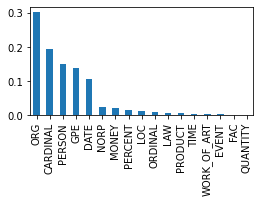

In [23]:
df["Labels"].value_counts(normalize=True).plot.bar(figsize=(4,2))
plt.show()

# Plotting top 25 entities labelled "ORG" (Organisation)

In [24]:
importance_org = (df["entities_"][df['Labels']=='ORG']).value_counts()

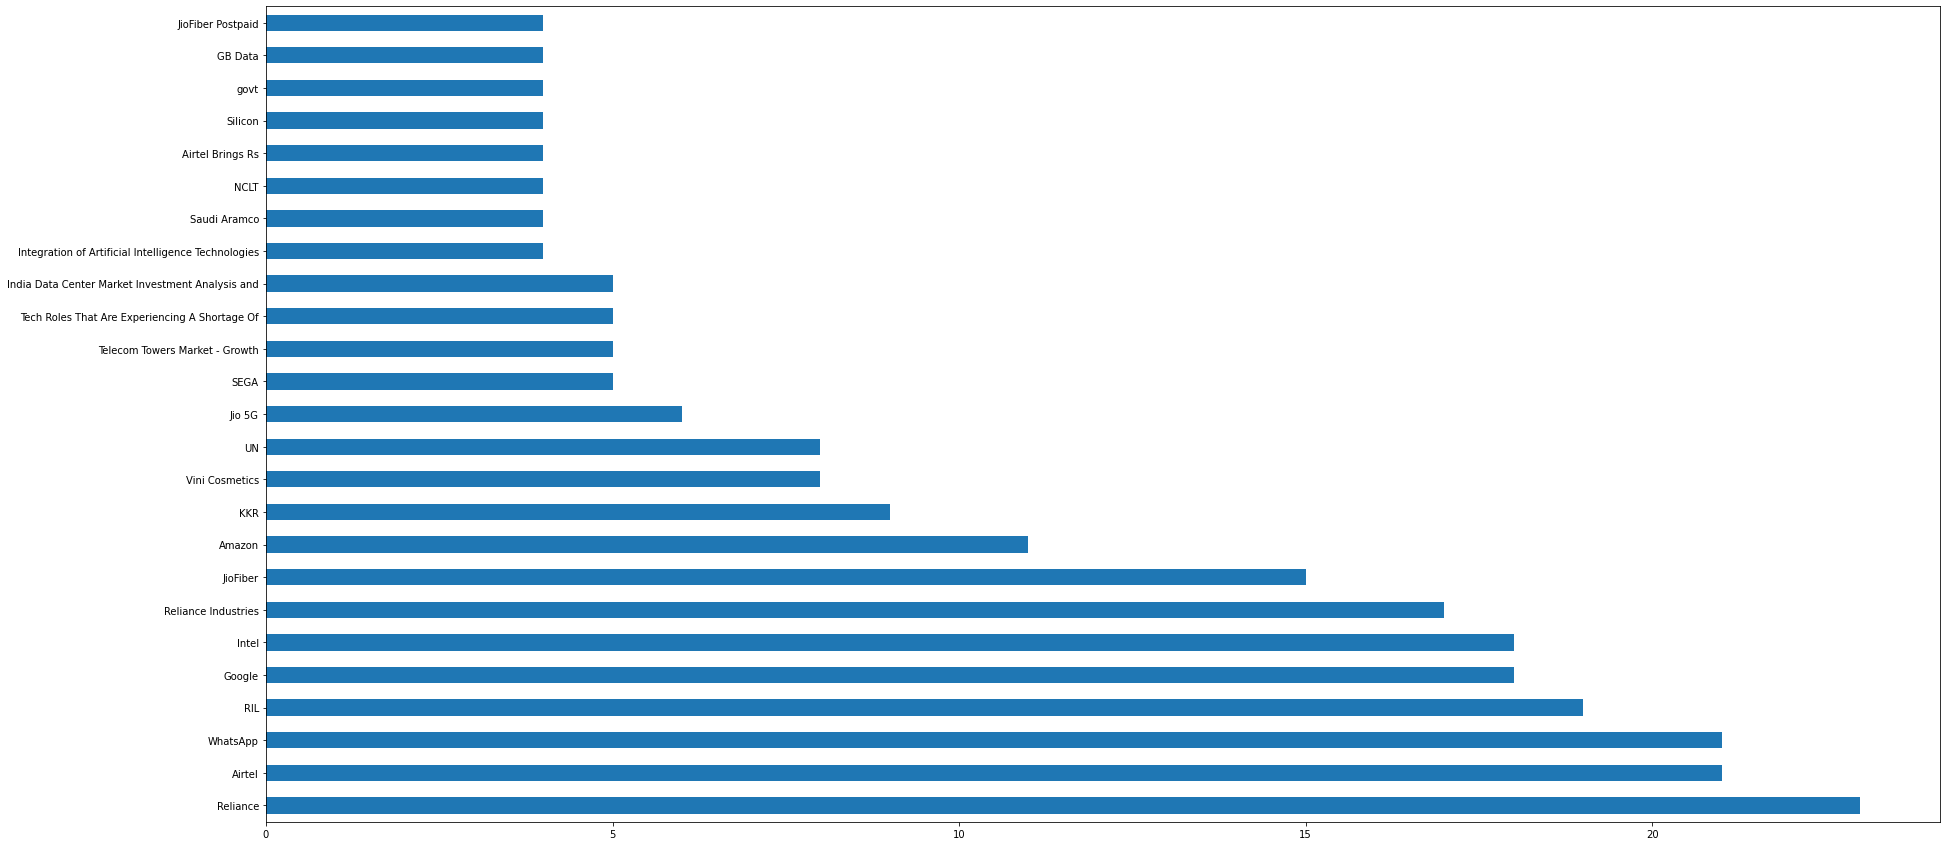

In [25]:
importance_org.nlargest(25).plot(kind="barh",figsize=(30,15))

# Plotting top 25 entities labelled "PERSON"

In [26]:
importance_person = (df["entities_"][df['Labels']=='PERSON']).value_counts()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 

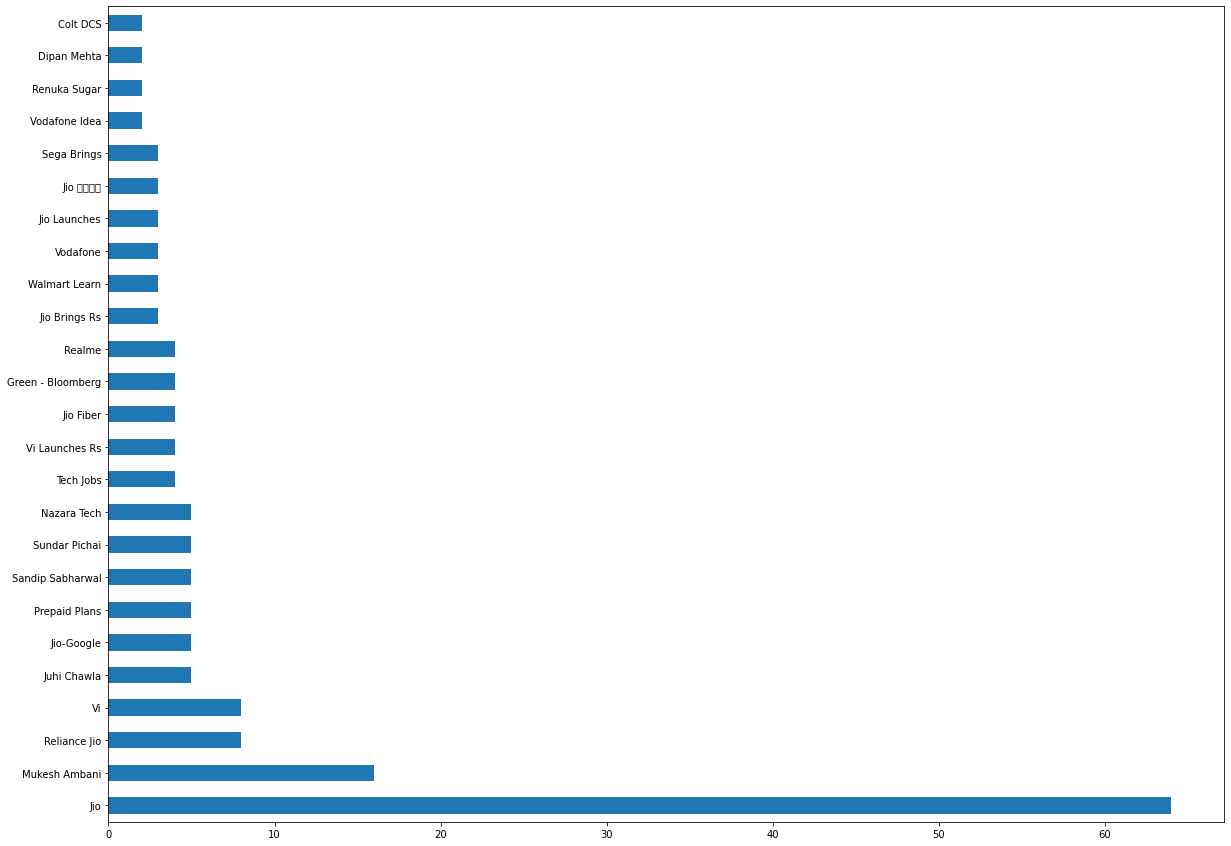

In [28]:
importance_person.nlargest(25).plot(kind="barh",figsize=(20,15))

# Plotting top 5 entities labelled "PRODUCT"

In [29]:
importance_product = (df["entities_"][df['Labels']=='PRODUCT']).value_counts()

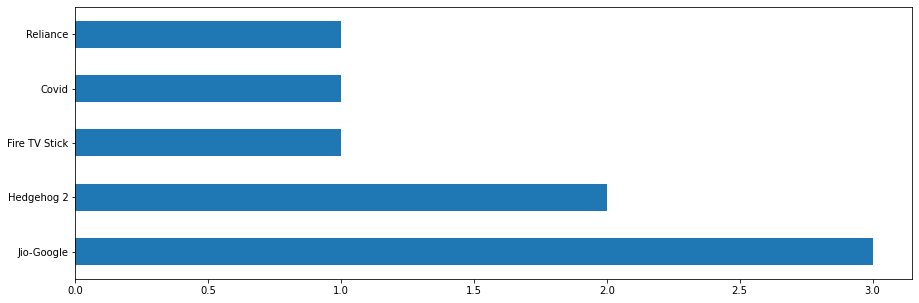

In [30]:
importance_product.nlargest(5).plot(kind="barh",figsize=(15,5))

#Plotting top 15 entities labelled "NORP" (Nationalities or religious or political groups.)

In [31]:
importance_norp = (df["entities_"][df['Labels']=='NORP']).value_counts()

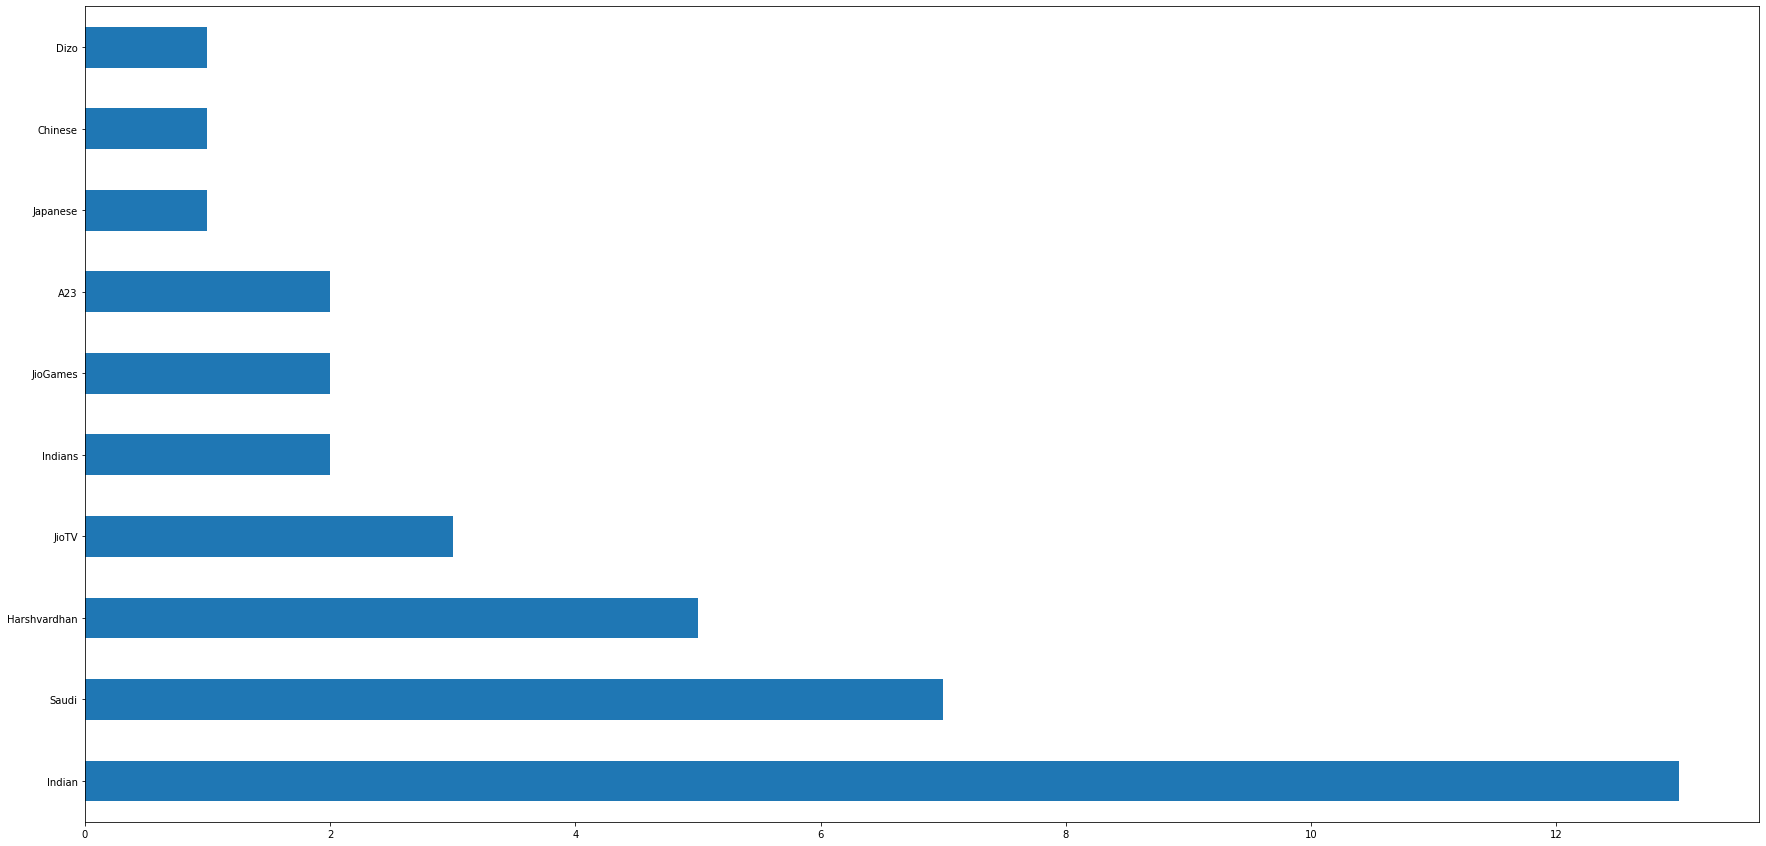

In [32]:
importance_norp.nlargest(15).plot(kind="barh",figsize=(30,15))

#Generating csv file for top n entities ( Including all labels)

In [33]:
n=100
top_n_levels=pd.DataFrame(df["entities_"].value_counts().head(n))

In [34]:
top_n_levels

,entities_
5,119
India,81
Jio,80
Reliance,24
Airtel,21
...,...
DHFL,3
Row With US Tech Giants,3
Music-Streaming Power Broker Rishi Malhotra,3
Prepaid Recharge Plan Back,3


In [ ]:
data.to_csv('top_n_entities1.csv')
!cp top_n_entities1.csv "/content/gdrive/My Drive/jiomeetDS"